# task1

In [1]:
import numpy as np
from typing import Union

num_elements = 10

np.random.seed(250)
numbers = np.random.randint(1, 10**3, size=num_elements).tolist()

def bubble_sort(numbers: list) -> Union[list, int]:
    n = len(numbers)
    num_operations = 0
    
    if n < 1:
        return [], num_operations

    sorted_numbers = numbers.copy()
    for i in range(n-1):
        for j in range(n-i-1):
            num_operations += 1
            if sorted_numbers[j] > sorted_numbers[j+1]:
                num_operations += 1
                sorted_numbers[j], sorted_numbers[j+1] = sorted_numbers[j+1], sorted_numbers[j]

    return sorted_numbers, num_operations

def insertion_sort(numbers: list) -> Union[list, int]:
    n = len(numbers)
    num_operations = 0
    
    if n < 1:
        return [], num_operations
    
    sorted_numbers = numbers.copy()
    for i in range(1, n):
        j = i
        num_operations += j
        while j > 0 and sorted_numbers[j-1] > sorted_numbers[j]:
            sorted_numbers[j-1], sorted_numbers[j] = sorted_numbers[j], sorted_numbers[j-1]
            j -= 1
    
    return sorted_numbers, num_operations

def selection_sort(numbers: list) -> Union[list, int]:    
    numbers = numbers.copy()
    num_operations = 0
    
    if not numbers:
        return [], num_operations
    
    sorted_numbers = []

    while len(numbers) > 0:
        smallest_number = numbers[0]
        
        for num in numbers[1:]:
            num_operations += 1
            if num < smallest_number:
                smallest_number = num
        
        sorted_numbers.append(smallest_number)
        numbers.remove(smallest_number)

    return sorted_numbers, num_operations

In [2]:
import time

np.random.seed(250)

sort_info = []

for i in range(14):
    num_elements = 2**i
    
    numbers = np.random.randint(1, 10**3, size=num_elements).tolist()

    start_time_b = time.perf_counter()
    sorted_numbers_b, num_operations_b = bubble_sort(numbers)
    end_time_b = time.perf_counter()

    start_time_i = time.perf_counter()
    sorted_numbers_i, num_operations_i = insertion_sort(numbers)
    end_time_i = time.perf_counter()
    
    start_time_s = time.perf_counter()
    sorted_numbers_s, num_operations_s = selection_sort(numbers)
    end_time_s = time.perf_counter()

    sort_info.append({
        "num_elements": num_elements,
        "time_bubble": end_time_b - start_time_b,
        "num_operations_bubble": num_operations_b,
        "time_insertion": end_time_i - start_time_i,
        "num_operations_insertion": num_operations_i,
        "time_selection": end_time_s - start_time_s,
        "num_operations_selection": num_operations_s,
    })

In [3]:
import pandas as pd

df = pd.DataFrame(sort_info)
df

,num_elements,time_bubble,num_operations_bubble,time_insertion,num_operations_insertion,time_selection,num_operations_selection
0,1,0.000005,0,0.000002,0,0.000003,0
1,2,0.000003,2,0.000001,1,0.000002,1
2,4,0.000003,10,0.000002,6,0.000003,6
3,8,0.000006,39,0.000004,28,0.000005,28
4,16,0.000020,162,0.000010,120,0.000012,120
5,32,0.000095,803,0.000067,496,0.000039,496
6,64,0.000315,3027,0.000194,2016,0.000221,2016
7,128,0.002086,12686,0.001577,8128,0.001556,8128
8,256,0.007852,48580,0.003674,32640,0.002199,32640
9,512,0.010531,194804,0.004207,130816,0.002959,130816


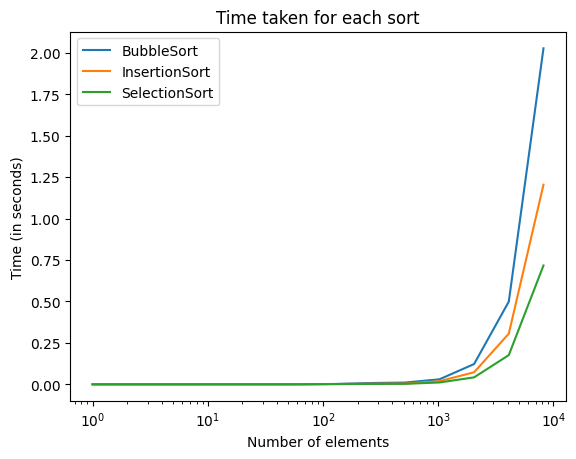

In [4]:
import matplotlib.pyplot as plt

plt.semilogx('num_elements', 'time_bubble', data=df, label = "BubbleSort")
plt.semilogx('num_elements', 'time_insertion', data=df, label = "InsertionSort")
plt.semilogx('num_elements', 'time_selection', data=df, label = "SelectionSort")
plt.title("Time taken for each sort")
plt.xlabel("Number of elements")
plt.ylabel("Time (in seconds)")
plt.legend()
plt.show();

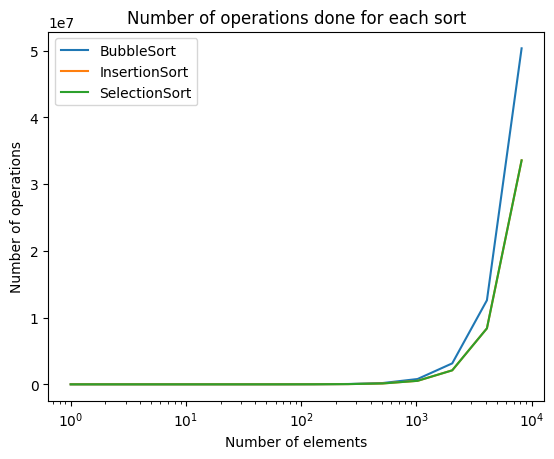

In [5]:
plt.semilogx('num_elements', 'num_operations_bubble', data=df, label = "BubbleSort")
plt.semilogx('num_elements', 'num_operations_insertion', data=df, label = "InsertionSort")
plt.semilogx('num_elements', 'num_operations_selection', data=df, label = "SelectionSort")
plt.title("Number of operations done for each sort")
plt.xlabel("Number of elements")
plt.ylabel("Number of operations")
plt.legend()
plt.show();

# task2

In [9]:
import numpy as np
from typing import Union

num_elements = 10

np.random.seed(250)
numbers = np.random.randint(1, 10**3, size=num_elements).tolist()
numbers

[879, 590, 219, 737, 990, 794, 571, 52, 925, 286]

In [14]:
def count_sort(numbers: list) -> list:
    numbers = numbers.copy()
    if not numbers:
        return []
        
    max_num = numbers[0]
    min_num = numbers[0]
    
    for num in numbers[1:]:
        if num > max_num:
            max_num = num
        elif num < min_num:
            min_num = num
    
    map_dict = {}
    
    for i in range(min_num, max_num+1):
        map_dict[i] = 0
    
    for num in numbers:
        map_dict[num] += 1
    
    sorted_numbers = []
    for num, val in map_dict.items():
        if val > 0:
            sorted_numbers.extend([num]*val)
    
    return sorted_numbers

In [16]:
np.random.seed(25)

new_sort_info = []
for run in sort_info:
    run = run.copy()
    num_elements = run['num_elements']

    numbers = np.random.randint(1, 10**3, size=num_elements).tolist()

    start_time_c = time.perf_counter()
    sorted_numbers_c = count_sort(numbers)
    end_time_c = time.perf_counter()

    run['time_count'] = end_time_c - start_time_c

    new_sort_info.append(run)

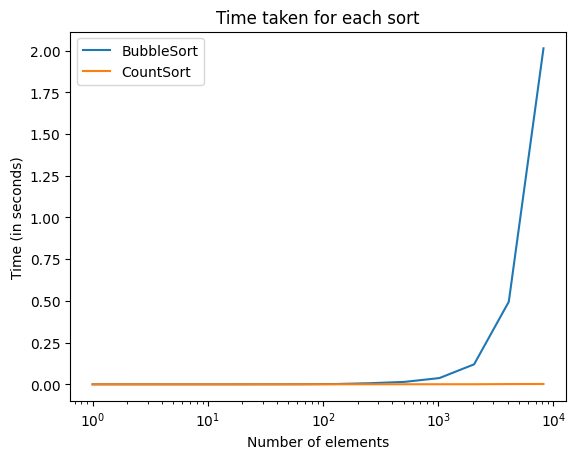

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(new_sort_info)

plt.semilogx('num_elements', 'time_bubble', data=df, label = "BubbleSort")
plt.semilogx('num_elements', 'time_count', data=df, label = "CountSort")
plt.title("Time taken for each sort")
plt.xlabel("Number of elements")
plt.ylabel("Time (in seconds)")
plt.legend()
plt.show();

# task3

Because we swap elements if and only if they were strictly bigger than another so elements with equal values will not swapped.

# task4

You are given an array/list of n distinct integers with values 1, 2, ..., n. You are allowed to perform exactly one left-to-right pass through the array in order to sort it. During this single pass:

- You may compare adjacent elements.
- You may swap an element with the element immediately to its right.
- You may perform as many adjacent swaps as you want, but only while scanning left-to-
right once (no restarting from the beginning).

For n elements, how many arrangements of the integers can be sorted in only one left-to-right pass?

*Solution*: So, I tried smaller samples to find a pattern. 

For `n=2`, array would be [1, 2] and variations [1, 2] and [2, 1]. So, overall `2`.

For `n=3`, arrays is [1, 2, 3] and 4 variantions: 
[1, 2, 3]   [1, 3, 2]
[2, 1, 3]   [3, 1, 2] 

For `n=4`, array is [1, 2, 3, 4] and 8 variations:
[1, 2, 3, 4]   [1, 2, 4, 3]
[1, 3, 2, 4]   [1, 4, 2, 3]
[2, 1, 3, 4]   [2, 1, 4, 3]
[3, 1, 2, 4]   [4, 1, 2, 3]

I found 2 patterns here. First when we are going from n to n+1, we are taking variations created with n elements and adding n+1th element at the end. And we are swapping n and n+1 to get such many variations again. Because, if we took an array [1, 2, 3, ..., n-1, n+1] we will have the same number of variations and to get sorted array, we can do the final swap. So, the formula should be **2^(n-1)**. 